In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [4]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

county
state
electricity_price_transportation


In [5]:
df_all = df_all.dropna()

In [6]:
df = df_all[df_all['total_panel_area_residential']>0]

In [7]:
res_cols = [col for col in df.columns if '_residential' in col]
res_cols

['tile_count_residential',
 'solar_system_count_residential',
 'total_panel_area_residential',
 'electricity_price_residential',
 'electricity_consume_residential',
 'incentive_count_residential',
 'incentive_residential_state_level']

In [8]:
min(df.incentive_count_residential), max(df.incentive_count_residential)

(8, 75)

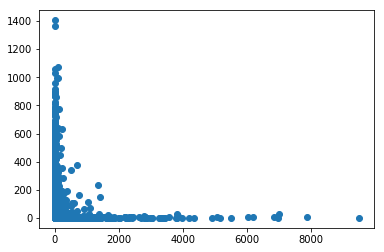

In [231]:
plt.scatter(df.land_area, df.solar_system_count_residential)

In [232]:
df['county'][df[target].argmax()], df['state'][df[target].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Cumberland County', 'nc')

In [233]:
df['county'][df['incentive_count_residential'].argmax()], df['state'][df['incentive_count_residential'].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Los Angeles County', 'ca')

In [234]:
df['county'][df['incentive_count_nonresidential'].argmax()], df['state'][df['incentive_count_nonresidential'].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Los Angeles County', 'ca')

In [235]:
df['county'][df['rebate'].argmax()], df['state'][df['rebate'].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Multnomah County', 'or')

In [236]:
df['county'][df['solar_system_count_residential'].argmax()], df['state'][df['solar_system_count_residential'].argmax()], df['solar_system_count_residential'][df['solar_system_count_residential'].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('San Diego County', 'ca', 1404.0)

In [237]:
df['county'][df['total_panel_area_residential'].argmax()], df['state'][df['total_panel_area_residential'].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Tulare County', 'ca')

In [238]:
df['county'][df['solar_system_count'].argmax()], df['state'][df['solar_system_count'].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Tulare County', 'ca')

In [239]:
df['county'][df['household_count'].argmax()], df['state'][df['household_count'].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Fort Bend County', 'tx')

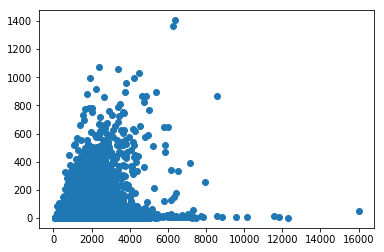

In [240]:
plt.scatter(df.household_count, df.solar_system_count_residential)

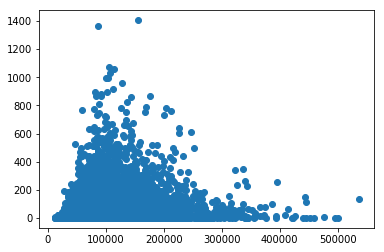

In [147]:
plt.scatter(df.average_household_income, df.solar_system_count_residential)

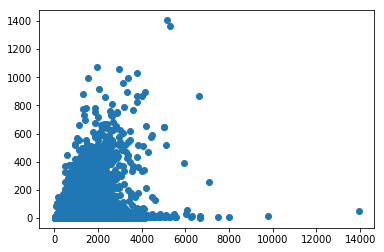

In [148]:
plt.scatter(df.poverty_family_count, df.solar_system_count_residential)

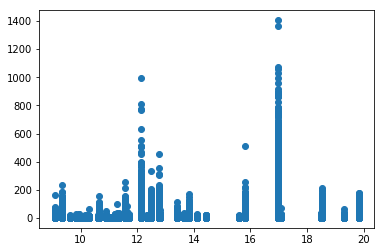

In [149]:
plt.scatter(df.electricity_price_residential, df.solar_system_count_residential)

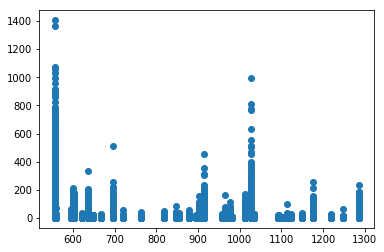

In [150]:
plt.scatter(df.electricity_consume_residential, df.solar_system_count_residential)

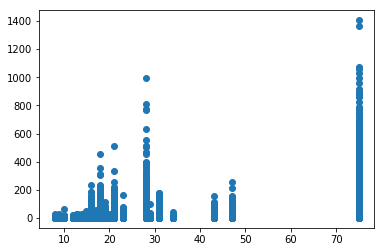

In [241]:
plt.scatter(df.incentive_count_residential, df.solar_system_count_residential)

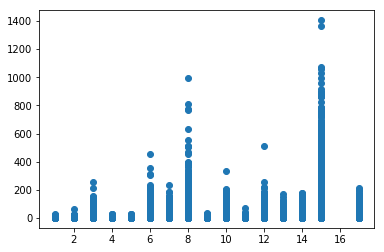

In [242]:
plt.scatter(df.incentive_residential_state_level, df.solar_system_count_residential)

Text(0,0.5,'solar systems per thousand households ')

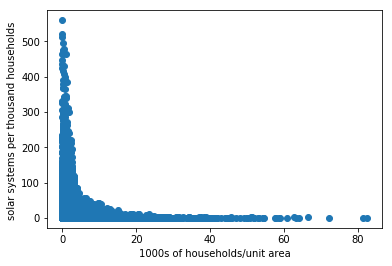

In [151]:
plt.scatter( df.household_count.div(df.total_area)*1/1000, df.number_of_solar_system_per_household*1000)
plt.xlabel('1000s of households/unit area')
plt.ylabel('solar systems per thousand households ')

Text(0,0.5,'solar systems per thousand households ')

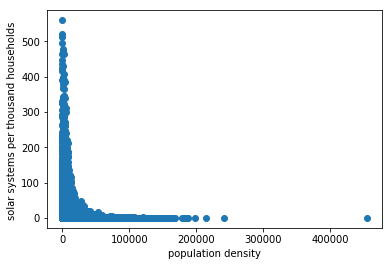

In [129]:
plt.scatter( df.population_density, df.number_of_solar_system_per_household*1000)
plt.xlabel('population density')
plt.ylabel('solar systems per thousand households ')

Text(0,0.5,'solar systems per thousand households ')

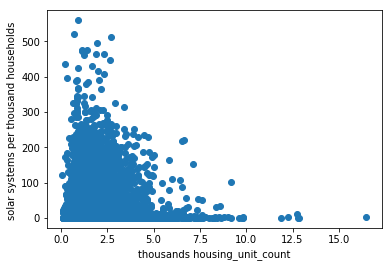

In [130]:
plt.scatter( df.housing_unit_count/1000, df.number_of_solar_system_per_household*1000)
plt.xlabel('thousands housing_unit_count')
plt.ylabel('solar systems per thousand households ')

Text(0,0.5,'solar systems per thousand households ')

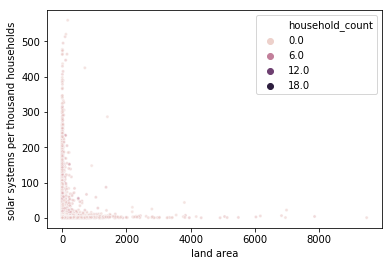

In [243]:
kwargs = {'alpha': .5}
sns.scatterplot( x = df.land_area,y = df['solar_system_count_residential'].div(df.household_count/1000), **kwargs, s=10,hue = df.household_count/1000)
plt.xlabel('land area')
plt.ylabel('solar systems per thousand households ')

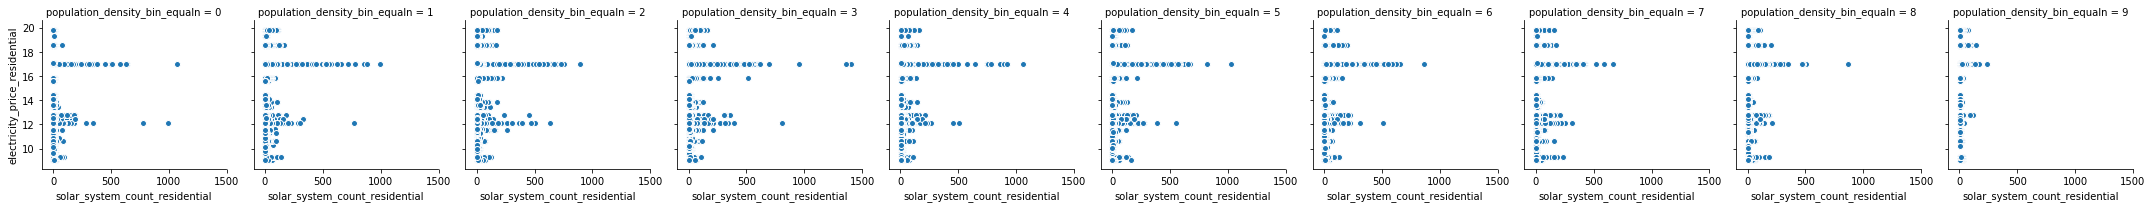

In [19]:
g = sns.FacetGrid(df, col="population_density_bin_equaln")
g = g.map(plt.scatter, "solar_system_count_residential", "electricity_price_residential", edgecolor="w")

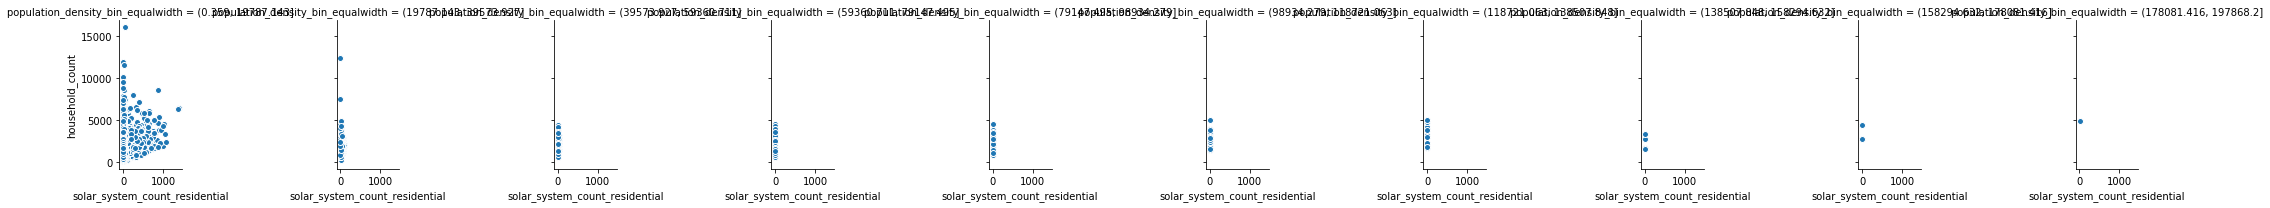

In [250]:
g = sns.FacetGrid(df, col="population_density_bin_equalwidth")
g = g.map(plt.scatter, "solar_system_count_residential", "household_count", edgecolor="w")

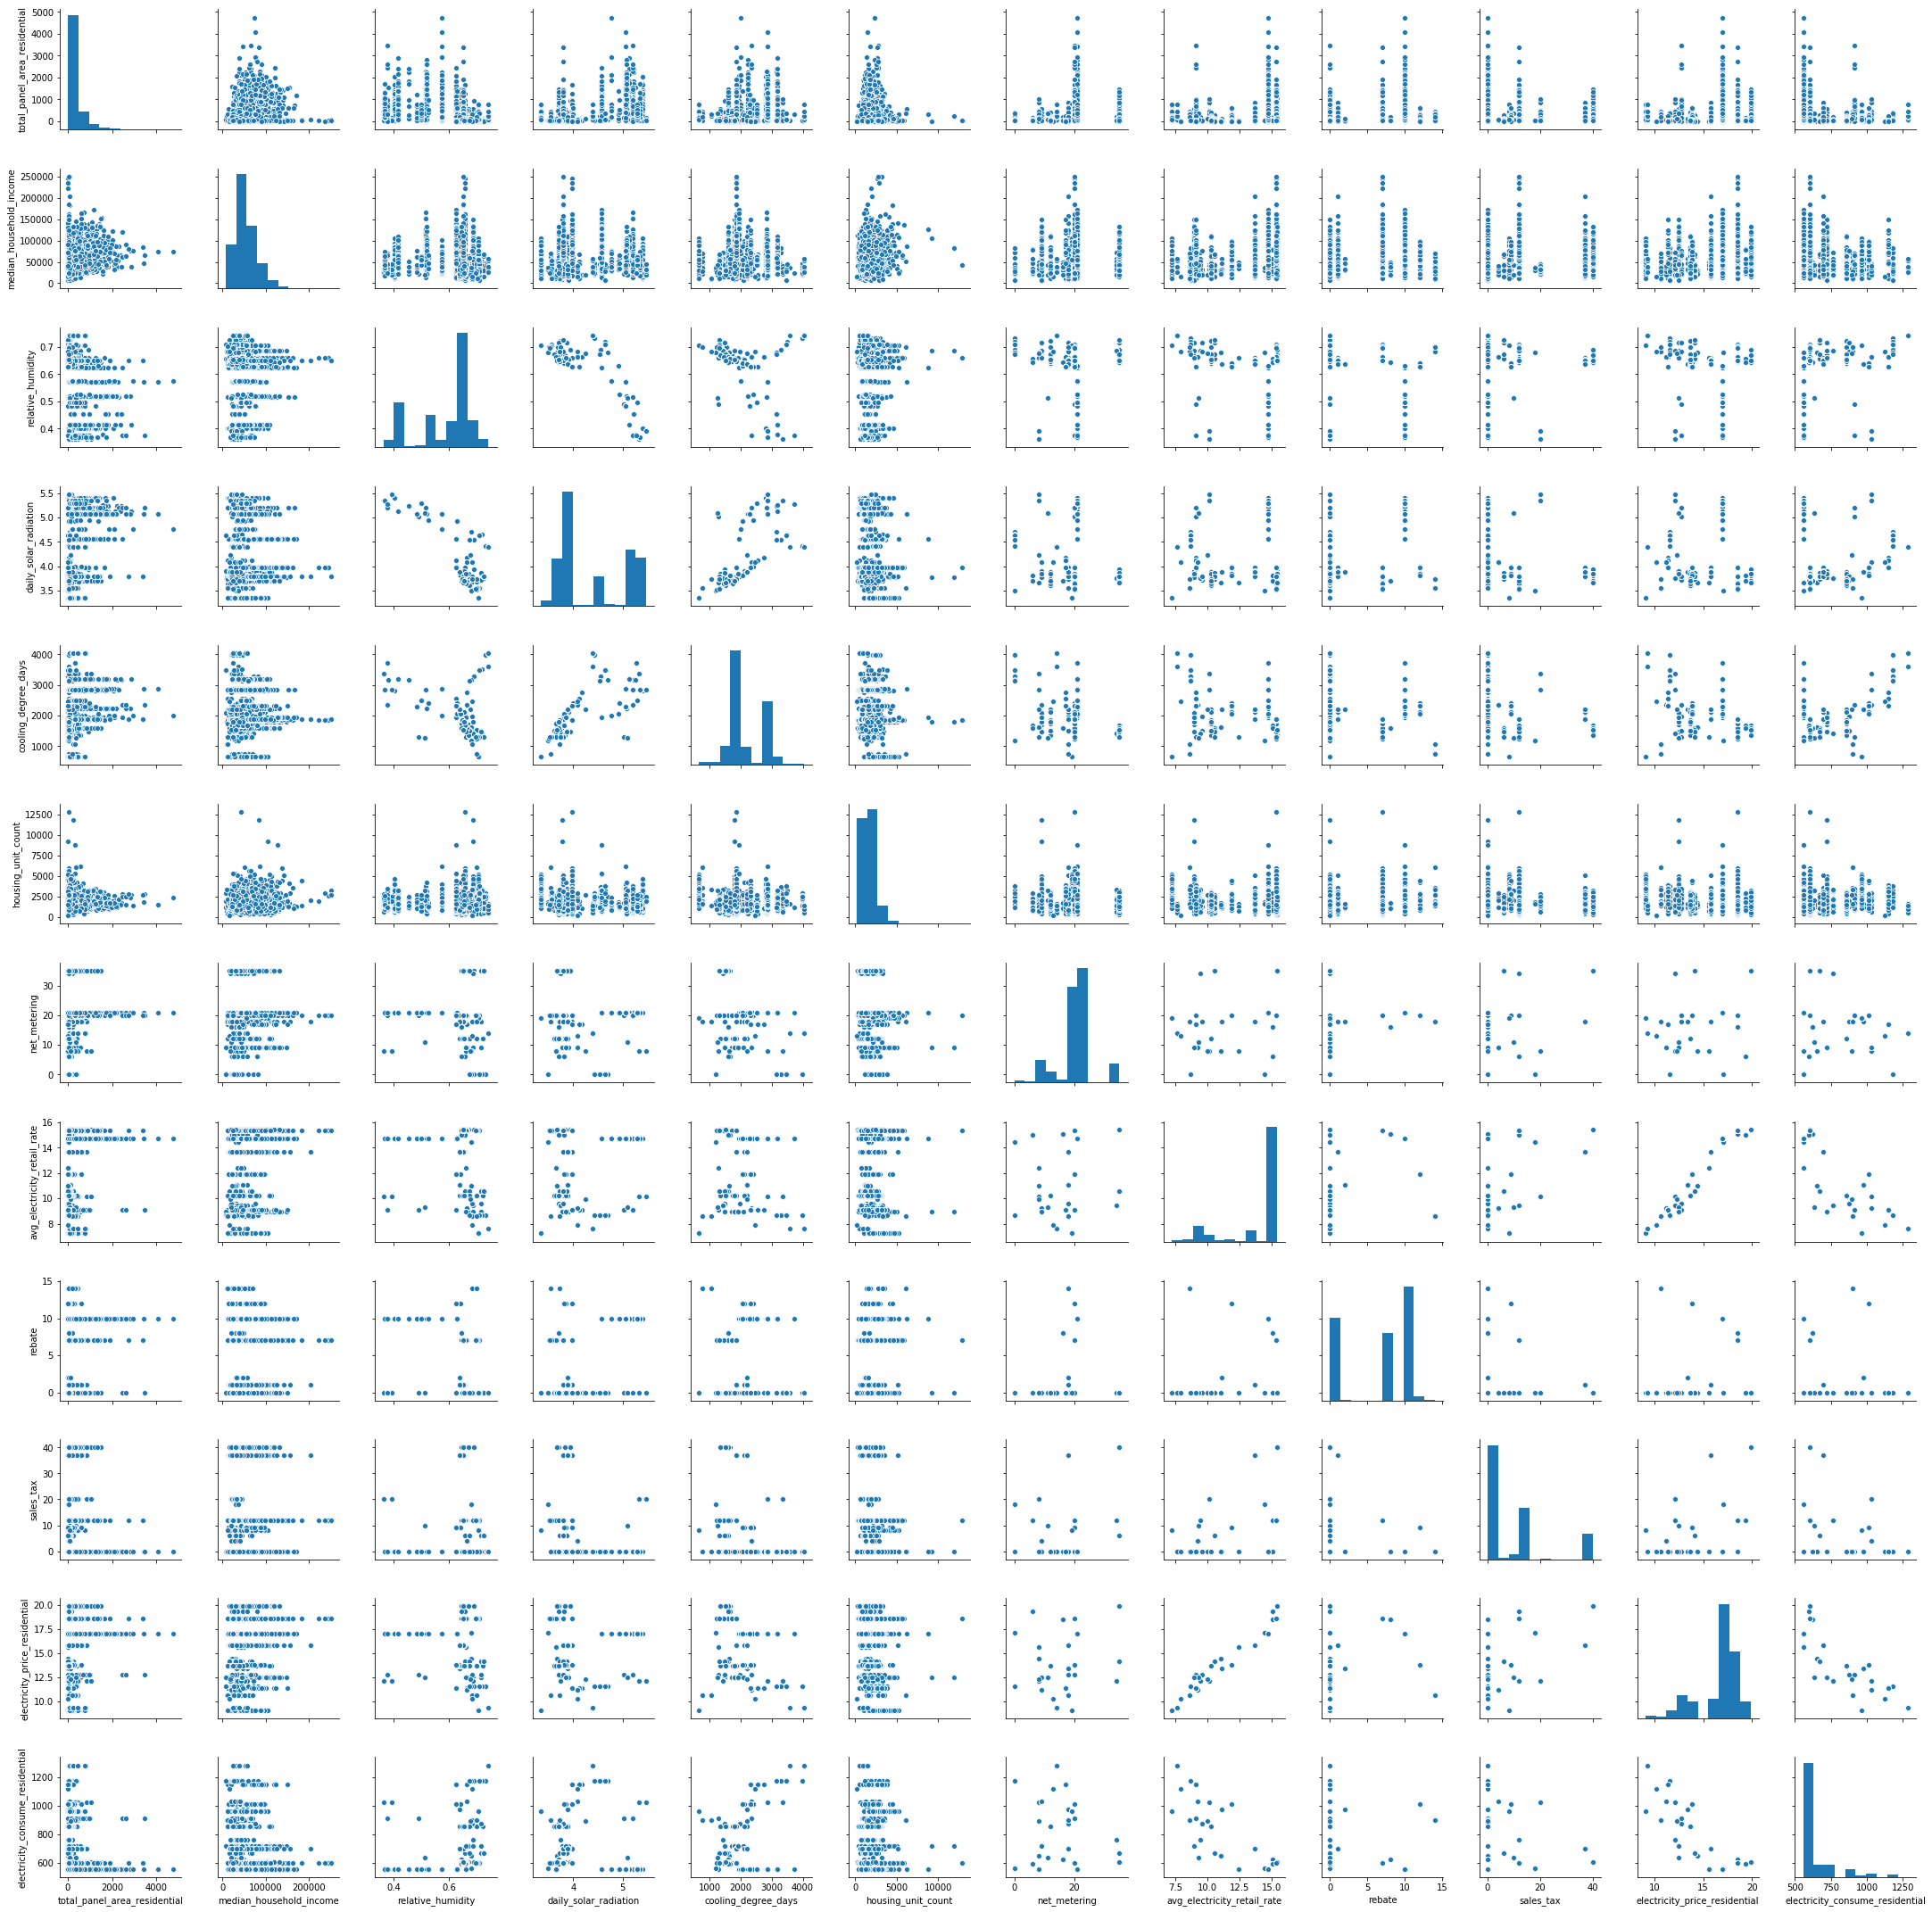

In [12]:

feat_list = ['total_panel_area_residential','median_household_income','relative_humidity','daily_solar_radiation','cooling_degree_days','housing_unit_count', 'net_metering','avg_electricity_retail_rate','rebate','sales_tax', 'electricity_price_residential','electricity_consume_residential']
sns.pairplot(df[df.population_density_bin_equaln=='9'][feat_list])

# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot)
# g.map_upper(sns.scatterplot)
# g.map_diag(sns.kdeplot, lw=3)

(0, 10000)

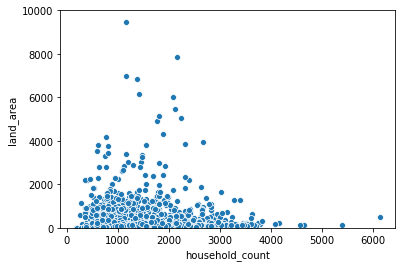

In [16]:
# df.land_area.plot.hist(bins = 1000)
ax = sns.scatterplot(x = df.household_count, y = df[df.population_density_bin_equaln=='0'].land_area)
ax.set_ylim(0, 10000)

In [9]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))


In [14]:
bins_equl_n

array([  3.58595100e-01,   1.24551020e+02,   4.27905340e+02,
         1.00157560e+03,   1.80602020e+03,   2.71249700e+03,
         3.75502180e+03,   5.10843460e+03,   7.12445400e+03,
         1.17800020e+04,   1.97868200e+05])

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


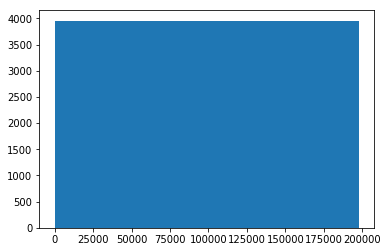

In [10]:
x = 10
n, bins_equl_n, patches = plt.hist(df.population_density, histedges_equalN(df.population_density, 10))
df['population_density_bin_equaln'] = pd.cut(df['population_density'],bins_equl_n, labels = [str(n) for n in range(len(bins_equl_n)-1)])


c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


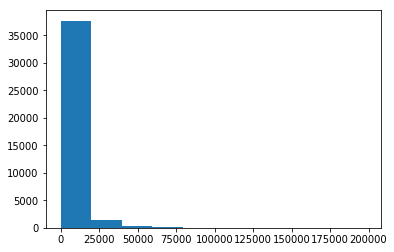

In [11]:
x = 10
n, bins_equl_width, patches = plt.hist(df.population_density, 10)
df['population_density_bin_equalwidth'] = pd.cut(df['population_density'],bins_equl_width)

0 education_bachelor
1 education_college
2 education_doctoral
3 education_high_school_graduate
4 education_less_than_high_school
5 education_master
6 education_professional_school


Text(0,0.5,'total_panel_area_residential')

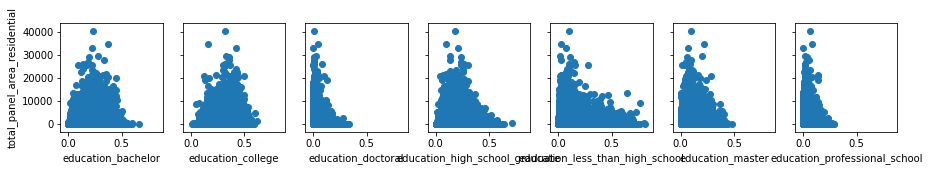

In [114]:
feats = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school',
'education_master','education_professional_school']

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (15,2))
for ind, var in enumerate(feats):
    print(ind, var)
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var].div(df.education_population), df['total_panel_area_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('total_panel_area_residential')

Text(0,0.5,'total_panel_area_residential')

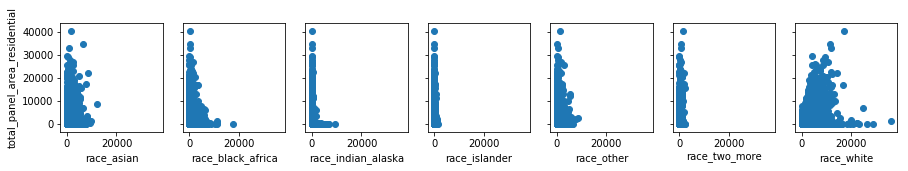

In [117]:
feats = ['race_asian',
'race_black_africa',
'race_indian_alaska',
'race_islander',
'race_other',
'race_two_more','race_white']

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (15,2))
for ind, var in enumerate(feats):
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var], df['total_panel_area_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('total_panel_area_residential')

Text(0,0.5,'total_panel_area_residential')

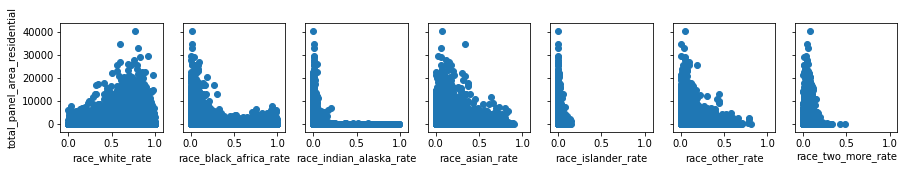

In [118]:
feats = ['race_white_rate',
'race_black_africa_rate',
'race_indian_alaska_rate',
'race_asian_rate',
'race_islander_rate',
'race_other_rate',
'race_two_more_rate']

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (15,2))
for ind, var in enumerate(feats):
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var], df['total_panel_area_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('total_panel_area_residential')

Text(0,0.5,'total_panel_area_residential')

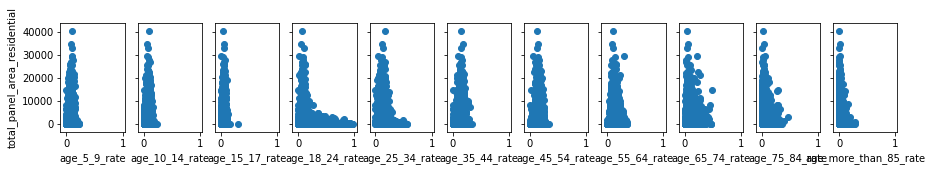

In [134]:
feats = ['age_5_9_rate',
'age_10_14_rate',
'age_15_17_rate','age_18_24_rate',
'age_25_34_rate',
'age_35_44_rate',
'age_45_54_rate','age_55_64_rate',
'age_65_74_rate', 'age_75_84_rate',
'age_more_than_85_rate',
]

f, ax = plt.subplots(1, len(feats), sharey=True, sharex = True, figsize = (15,2))
for ind, var in enumerate(feats):
#     ax.subplot(1,len(feats), ind+1)
    ax[ind].scatter(df[var], df['total_panel_area_residential'])
    ax[ind].set_xlabel(var)
ax[0].set_ylabel('total_panel_area_residential')

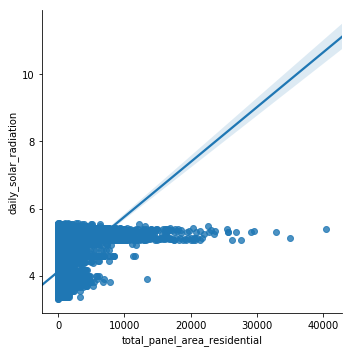

In [120]:
sns.lmplot(data = df, x='total_panel_area_residential', y = 'daily_solar_radiation' )

In [143]:
len(df[df['total_panel_area_residential']>0]), len( df['total_panel_area_residential'])

(39564, 54099)

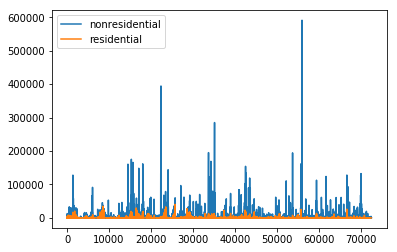

In [32]:
# df['total_panel_area_nonresidential'].plot()
# df['total_panel_area_residential'].plot()

plt.plot(df.index, df['total_panel_area_nonresidential'], label= 'nonresidential')
plt.plot(df.index, df['total_panel_area_residential'], label= 'residential')

plt.legend()

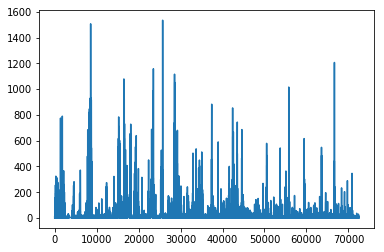

In [33]:
plt.plot(df.index, df['solar_system_count'])

In [58]:
for col in df.columns:
    print(col)

Unnamed: 0
tile_count
solar_system_count
total_panel_area
fips
average_household_income
county
education_bachelor
education_college
education_doctoral
education_high_school_graduate
education_less_than_high_school
education_master
education_population
education_professional_school
employed
gini_index
heating_fuel_coal_coke
heating_fuel_electricity
heating_fuel_fuel_oil_kerosene
heating_fuel_gas
heating_fuel_housing_unit_count
heating_fuel_none
heating_fuel_other
heating_fuel_solar
land_area
per_capita_income
population
population_density
poverty_family_below_poverty_level
poverty_family_count
race_asian
race_black_africa
race_indian_alaska
race_islander
race_other
race_two_more
race_white
state
total_area
unemployed
water_area
education_less_than_high_school_rate
education_high_school_graduate_rate
education_college_rate
education_bachelor_rate
education_master_rate
education_professional_school_rate
education_doctoral_rate
race_white_rate
race_black_africa_rate
race_indian_alaska_rate

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


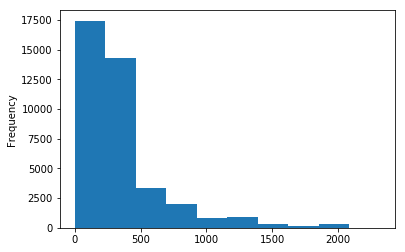

In [135]:
df['elevation'].plot.hist()

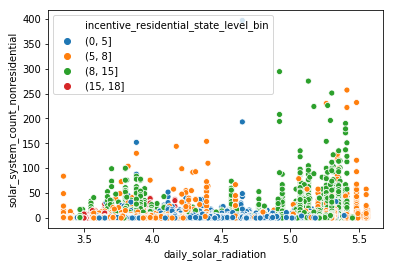

In [94]:
sns.scatterplot(df['daily_solar_radiation'], df[target], hue =df['incentive_residential_state_level_bin'])#df['incentive_residential_state_level'] )

[   4174.    28756.7   53339.4   77922.1  102504.8  127087.5  151670.2
  176252.9  200835.6  225418.3  250001. ]


c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


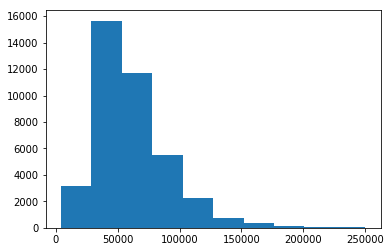

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

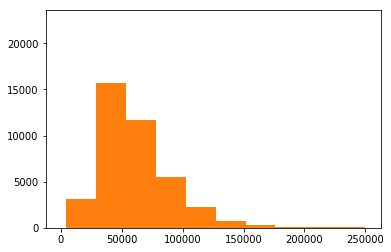

In [145]:
n, bins, patches = plt.hist(df['mortgage_with_rate'],5)
df['mortgage_with_rate_bin'] = pd.cut(df['mortgage_with_rate'],bins, labels = [n for n in range(len(bins)-1)])

df['incentive_residential_state_level_bin'] = pd.cut(df['incentive_residential_state_level'],[0,5,8,15,18])
df['daily_solar_radiation_bin'] = pd.cut(df['daily_solar_radiation'],[0,4,5,7], labels = [n for n in range(len([0,4,5,7])-1)])

n, bins, patches = plt.hist(df['median_household_income'],10)
df['median_household_income_bin'] = pd.cut(df['median_household_income'],bins, labels = [n for n in range(len(bins)-1)])

df['age_retired']= df.population*df.age_65_74_rate + df.population*df.age_75_84_rate + df.population*df.age_more_than_85_rate 
df['age_retired_rate'] = df['age_retired'].div(df.population)

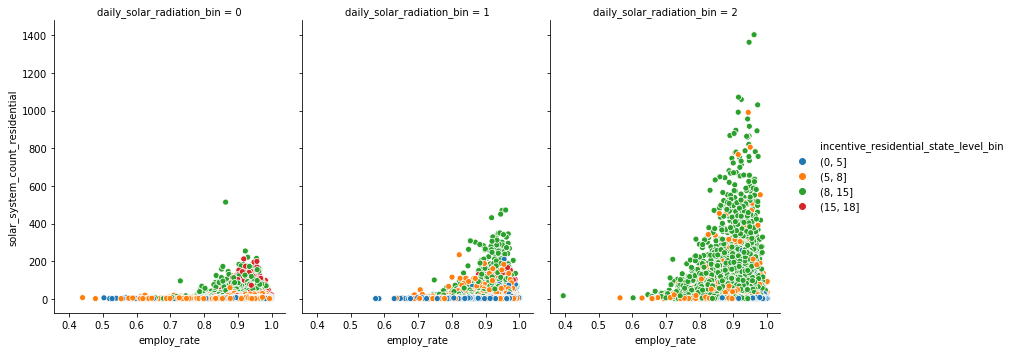

In [154]:
sns.relplot(x="employ_rate", y=target,
            hue="incentive_residential_state_level_bin", col="daily_solar_radiation_bin",
            size_order=["T1", "T2"],
            height=5, aspect=.75, facet_kws=dict(sharex=True),
            kind="scatter", legend="full", data=df)

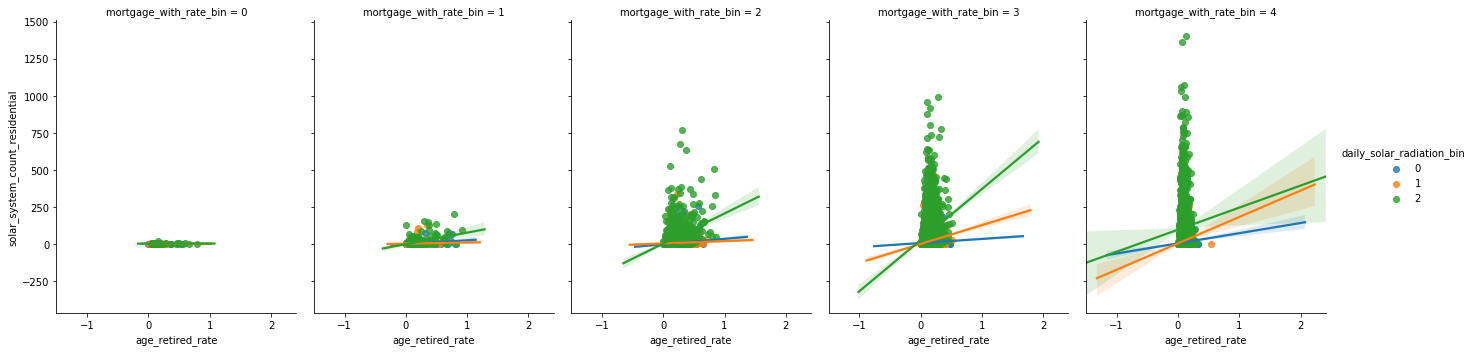

In [152]:
sns.lmplot(x="age_retired_rate", y=target,
            hue="daily_solar_radiation_bin", col="mortgage_with_rate_bin",
            height=5, aspect=.75, legend="full", data=df)

In [157]:
target = 'solar_system_count_residential'#'total_panel_area'

binned_var_omit = [col for col in df.columns if '_bin' in col]

omit = ['Unnamed: 0','total_panel_area', 'population_density_bin_equalwidth','population_density_bin_equaln','fips', 'county', 'state', 'electricity_price_transportation', 'total_panel_area_residential',
'total_panel_area_nonresidential',  'education_population','solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
        'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 'solar_system_count', 'solar_system_count_residential']

edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate']

X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_omit+race_omit+heat_fuel_omit+binned_var_omit)]
# X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_rate_omit+race_rate_omit+heat_fuel_rate_omit)]

Y = df[target]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

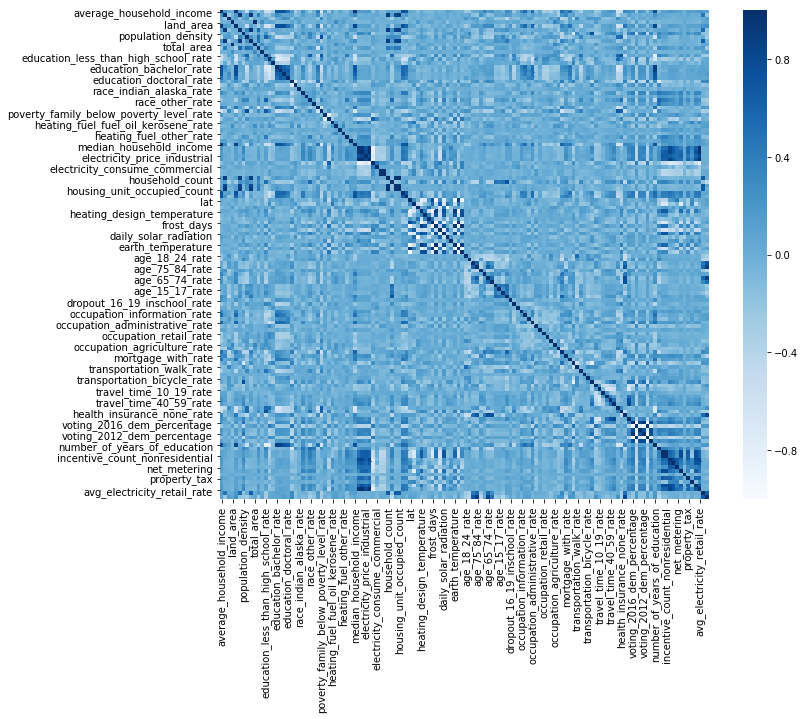

In [159]:
# corrmat = df[df.columns[0:60]].corr()#alt_X_df.corr()

corrmat = X.corr()
fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True, annot=False,cmap='Blues')

## Linear Regression

In [160]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
pred = lin_reg.predict(X_test)

In [162]:
lin_reg.score(X_test, y_test)

0.5988394067937387

In [163]:
X.columns[lin_reg.coef_.argsort()]

Index(['electricity_consume_total', 'number_of_years_of_education',
       'total_area', 'housing_unit_occupied_count',
       'transportation_bicycle_rate', 'household_type_family_rate',
       'travel_time_60_89_rate', 'occupation_information_rate',
       'air_temperature', 'travel_time_30_39_rate',
       ...
       'race_islander_rate', 'race_other_rate', 'race_asian_rate',
       'race_indian_alaska_rate', 'race_white_rate', 'race_black_africa_rate',
       'race_two_more_rate', 'electricity_consume_residential',
       'electricity_consume_commercial', 'electricity_consume_industrial'],
      dtype='object', length=132)

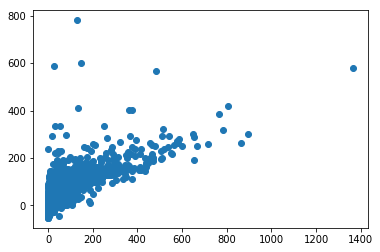

In [164]:
plt.scatter(y_test,pred)

In [165]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.55890297512752496

In [166]:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.59760946726972763

## Support Vector Machines (Regression)

In [167]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
from sklearn.svm import SVR
params = {'kernel' :'linear'}
svr = SVR(**params)
svr.fit(scaler.transform(X_train), y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
preds = svr.predict(scaler.transform(X_test))
svr.score(scaler.transform(X_test), y_test)

0.79519612203969858

## Ensemble Methods

In [168]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [169]:
clf.score(X_test, y_test)

0.80714094189802221

MSE: 674.8856


Text(0.5,1,'Variable Importance')

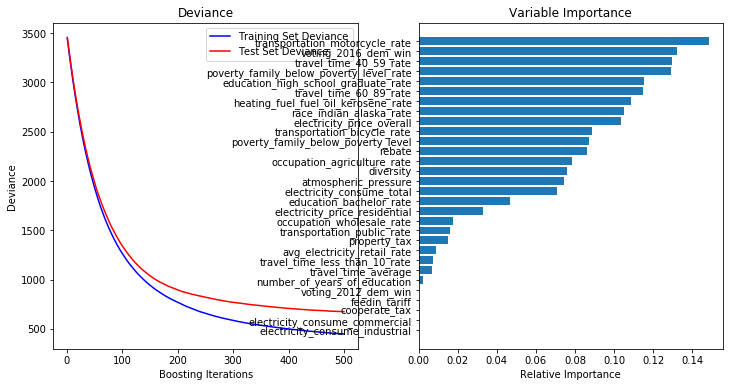

In [170]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[:30], feature_importance[sorted_idx][:30], align='center')
plt.yticks(pos[:30], X_test.columns[sorted_idx][:30])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')